# Will we get a White Christmas in Transylvania in 2020?

First, I have to analyze the weather data (precipitation and temperatures registered for each city) and determine, for each city, the years were they registered a White Christmas or not.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Transylvania_Christmas_Wheather.xlsx")
df.head()

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA RO,1950-12-01,4.3,NaN,7.9,1.6
1,CLUJ NAPOCA RO,1950-12-02,0.0,NaN,2.7,-1.2
2,CLUJ NAPOCA RO,1950-12-03,0.0,NaN,0.4,-3.0
3,CLUJ NAPOCA RO,1950-12-04,0.0,NaN,1.3,-3.2
4,CLUJ NAPOCA RO,1950-12-05,3.3,NaN,7.0,-0.3


PRCP - precipitation per day

TAVG - average temperature per day

TMAX - maximum temperature per day

TMIN - minimum temperature per day

In [3]:
df.dtypes

NAME            object
DATE    datetime64[ns]
PRCP           float64
TAVG           float64
TMAX           float64
TMIN           float64
dtype: object

In [4]:
df.shape

(68815, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68815 entries, 0 to 68814
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NAME    68815 non-null  object        
 1   DATE    68815 non-null  datetime64[ns]
 2   PRCP    68397 non-null  float64       
 3   TAVG    39406 non-null  float64       
 4   TMAX    68705 non-null  float64       
 5   TMIN    68655 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 3.2+ MB


In [6]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,68397.000000,39406.000000,68705.000000,68655.000000
mean,1.636538,9.026176,15.153561,4.261601
std,4.388025,9.005401,10.215610,8.076367
min,0.000000,-27.100000,-20.400000,-34.200000
25%,0.000000,1.900000,6.500000,-1.300000
50%,0.000000,9.900000,16.400000,5.000000
75%,1.000000,16.600000,23.600000,10.900000
max,81.600000,30.000000,40.000000,25.500000


In our data set, we have, for each city, the precipitation and the average, minimum, and maximum temperature registered for all the days that there were measurements made by the weather stations of these cities starting with December 1950 until December 2019.

The first change that I want to make on the data set is to extract only the month of December for all of the years.

In [7]:
df = df[(df['DATE'].dt.month == 12)]

In [8]:
df.head(-40)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA RO,1950-12-01,4.3,NaN,7.9,1.6
1,CLUJ NAPOCA RO,1950-12-02,0.0,NaN,2.7,-1.2
2,CLUJ NAPOCA RO,1950-12-03,0.0,NaN,0.4,-3.0
3,CLUJ NAPOCA RO,1950-12-04,0.0,NaN,1.3,-3.2
4,CLUJ NAPOCA RO,1950-12-05,3.3,NaN,7.0,-0.3
...,...,...,...,...,...,...
68436,SIBIU RO,2018-12-18,11.7,-1.6,0.8,-2.1
68437,SIBIU RO,2018-12-19,0.1,-2.1,-0.4,-2.9
68438,SIBIU RO,2018-12-20,0.0,-2.3,-0.7,-2.8
68439,SIBIU RO,2018-12-21,0.0,-3.8,1.1,-5.8


In [9]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA RO,1950-12-01,4.3,NaN,7.9,1.6
1,CLUJ NAPOCA RO,1950-12-02,0.0,NaN,2.7,-1.2
2,CLUJ NAPOCA RO,1950-12-03,0.0,NaN,0.4,-3.0
3,CLUJ NAPOCA RO,1950-12-04,0.0,NaN,1.3,-3.2
4,CLUJ NAPOCA RO,1950-12-05,3.3,NaN,7.0,-0.3
...,...,...,...,...,...,...
68809,SIBIU RO,2019-12-26,2.3,1.9,3.6,0.4
68810,SIBIU RO,2019-12-27,0.0,1.8,5.3,-0.8
68811,SIBIU RO,2019-12-28,2.8,-0.3,1.3,-1.3
68812,SIBIU RO,2019-12-29,4.7,-2.6,-0.3,-3.2


In [10]:
df.shape

(5869, 6)

After I extracted the needed data, I want to reindex my data set.

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA RO,1950-12-01,4.3,NaN,7.9,1.6
1,CLUJ NAPOCA RO,1950-12-02,0.0,NaN,2.7,-1.2
2,CLUJ NAPOCA RO,1950-12-03,0.0,NaN,0.4,-3.0
3,CLUJ NAPOCA RO,1950-12-04,0.0,NaN,1.3,-3.2
4,CLUJ NAPOCA RO,1950-12-05,3.3,NaN,7.0,-0.3
...,...,...,...,...,...,...
5863,SIBIU RO,2019-12-26,2.3,1.9,3.6,0.4
5864,SIBIU RO,2019-12-27,0.0,1.8,5.3,-0.8
5865,SIBIU RO,2019-12-28,2.8,-0.3,1.3,-1.3
5866,SIBIU RO,2019-12-29,4.7,-2.6,-0.3,-3.2


From the month of December, so that I could determine if there was a White Christmas or not, I want to extract the days of 23, 24, and 25 of December because if it snowed on the 23rd and it was cold and snowed or not on the 24th and the 25th, or if only on the 24th was cold and snowed and on the 25th was cold and snowed or not then we can say that there was a White Christmas. We can say the same thing if it snowed only on the 25th.  

In [13]:
df = df[(df['DATE'].dt.day == 23) | (df['DATE'].dt.day == 24) | (df['DATE'].dt.day == 25)]

In [14]:
df.head(-40)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
22,CLUJ NAPOCA RO,1950-12-23,0.0,NaN,4.0,-2.4
23,CLUJ NAPOCA RO,1950-12-24,0.0,NaN,7.0,0.8
24,CLUJ NAPOCA RO,1950-12-25,0.0,NaN,9.3,-0.1
53,CLUJ NAPOCA RO,1951-12-23,0.0,NaN,-7.8,-12.1
54,CLUJ NAPOCA RO,1951-12-24,0.0,NaN,-6.5,-10.0
...,...,...,...,...,...,...
5426,SIBIU RO,2005-12-23,4.8,-3.8,-2.6,-5.5
5427,SIBIU RO,2005-12-24,1.1,-2.8,-0.4,-4.8
5428,SIBIU RO,2005-12-25,0.2,1.0,4.5,-2.3
5457,SIBIU RO,2006-12-23,0.0,1.8,4.8,-0.6


In [15]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
22,CLUJ NAPOCA RO,1950-12-23,0.0,NaN,4.0,-2.4
23,CLUJ NAPOCA RO,1950-12-24,0.0,NaN,7.0,0.8
24,CLUJ NAPOCA RO,1950-12-25,0.0,NaN,9.3,-0.1
53,CLUJ NAPOCA RO,1951-12-23,0.0,NaN,-7.8,-12.1
54,CLUJ NAPOCA RO,1951-12-24,0.0,NaN,-6.5,-10.0
...,...,...,...,...,...,...
5829,SIBIU RO,2018-12-23,0.1,5.9,8.5,3.2
5830,SIBIU RO,2018-12-24,9.8,2.8,7.1,0.9
5831,SIBIU RO,2018-12-25,0.3,-1.0,3.1,-2.3
5860,SIBIU RO,2019-12-23,3.8,7.4,13.2,5.2


In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
df.shape

(566, 6)

The names of the cities also contain the ' RO' extension and I want to get rid of that.

In [18]:
df['NAME'] = df['NAME'].str[:-3]

In [19]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA,1950-12-23,0.0,NaN,4.0,-2.4
1,CLUJ NAPOCA,1950-12-24,0.0,NaN,7.0,0.8
2,CLUJ NAPOCA,1950-12-25,0.0,NaN,9.3,-0.1
3,CLUJ NAPOCA,1951-12-23,0.0,NaN,-7.8,-12.1
4,CLUJ NAPOCA,1951-12-24,0.0,NaN,-6.5,-10.0
...,...,...,...,...,...,...
560,SIBIU,2018-12-23,0.1,5.9,8.5,3.2
561,SIBIU,2018-12-24,9.8,2.8,7.1,0.9
562,SIBIU,2018-12-25,0.3,-1.0,3.1,-2.3
563,SIBIU,2019-12-23,3.8,7.4,13.2,5.2


In [20]:
df.isnull().sum()

NAME      0
DATE      0
PRCP      0
TAVG    241
TMAX      0
TMIN      1
dtype: int64

When I check for the null values in the dataset, I can see that for TAVG - average temperature, I have 241 null values but I can solve this problem by filling the null values with the average value of the minimum and maximum values registered that day. When building the dataset, I wanted to extract the minimum and maximum temperatures because I knew that, if I had null values in my temperatures, I can use the average value of the two to solve this issue.

I have a single null value in my minimum temperature feature. If at that row, I don't have a null value in my average temperature feature, TAVG, then I won't change this null value because in determining if we had a White Christmas or not, I'm going to use only the average temperatures and precipitations.

In [21]:
df[df['TMIN'].isnull()].index.tolist()

[388]

In [22]:
print(df.loc[[388]])

      NAME       DATE  PRCP  TAVG  TMAX  TMIN
388  SIBIU 1953-12-24   1.5  -4.0  -2.2   NaN


Next, I want to fill in the null values in my TAVG feature with the average of the minimum and maximum temperature and after that, I want to drop the features TMAX and TMIN.

In [23]:
df['TAVG'] = df.apply(
    lambda row: (row['TMAX']+row['TMIN'])/2 if np.isnan(row['TAVG']) else row['TAVG'],
    axis=1
)

In [24]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,CLUJ NAPOCA,1950-12-23,0.0,0.80,4.0,-2.4
1,CLUJ NAPOCA,1950-12-24,0.0,3.90,7.0,0.8
2,CLUJ NAPOCA,1950-12-25,0.0,4.60,9.3,-0.1
3,CLUJ NAPOCA,1951-12-23,0.0,-9.95,-7.8,-12.1
4,CLUJ NAPOCA,1951-12-24,0.0,-8.25,-6.5,-10.0
...,...,...,...,...,...,...
560,SIBIU,2018-12-23,0.1,5.90,8.5,3.2
561,SIBIU,2018-12-24,9.8,2.80,7.1,0.9
562,SIBIU,2018-12-25,0.3,-1.00,3.1,-2.3
563,SIBIU,2019-12-23,3.8,7.40,13.2,5.2


In [25]:
df.isnull().sum()

NAME    0
DATE    0
PRCP    0
TAVG    0
TMAX    0
TMIN    1
dtype: int64

In [26]:
 df = df.drop(columns =['TMAX', 'TMIN']) 

For each year in my data set, I have the weather data for 3 days, respectively for the 23th, 24th, and 25th of December, from 1950 to 2019 for each of the three cities. If I divide 566, the total number of days I have in my dataset, with 3, I get a division with a remainder and that means that I don't have, for those three cities, the exact three days for each year, so, I think that some days are missing from my data set. I am going to check the first rows of each the city. The first rows for Cluj Napoca I can see that are fine so I will check for the first rows which contain the weather data for Sibiu. 

In [27]:
print(df.loc[[386, 387, 388, 389]])

      NAME       DATE  PRCP  TAVG
386   DEVA 2019-12-25   2.3  4.45
387  SIBIU 1952-12-23   3.0  2.30
388  SIBIU 1953-12-24   1.5 -4.00
389  SIBIU 1961-12-23   3.1 -9.65


We can see above that, for 1952 and 1953 in the case of Sibiu, we have only one-day for December but we need three so, I think that the best approach here is to drop these two rows.

In [28]:
df.drop(df.index[[387, 388]], inplace=True)

In [29]:
df.shape

(564, 4)

In [30]:
df.reset_index(drop=True, inplace=True)

In [31]:
df.shape

(564, 4)

After I dropped the rows and reindexed the data set, the total number of rows was 564, which divided by 3 gives a result without a remainder so I can conclude that the data set now contains for each year, the three days that I need to determine if in each year of the data set there was registered a White Christmas or not.

For determining if in each year of the data set there was registered a White Christmas or not, first I am going to transform the features precipitation 'PRCP' and average temperature 'TAVG' into lists and I'm going to use them to make a new list which will contain the expected answer. 

In [32]:
PRCP = list(df['PRCP'])
PRCP

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.2,
 0.0,
 0.0,
 1.5,
 0.6,
 0.5,
 0.2,
 0.7,
 0.0,
 0.0,
 0.0,
 0.2,
 1.3,
 11.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.6,
 1.2,
 0.0,
 0.0,
 0.5,
 1.2,
 0.0,
 0.8,
 0.6,
 3.0,
 0.0,
 1.4,
 1.6,
 5.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.8,
 0.0,
 0.0,
 2.9,
 0.3,
 1.2,
 6.3,
 4.2,
 2.3,
 2.6,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 2.3,
 0.3,
 0.0,
 0.1,
 1.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.1,
 0.0,
 11.9,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.3,
 0.0,
 0.0,
 0.0,
 11.7,
 2.7,
 0.0,
 0.0,
 3.0,
 0.3,
 5.4,
 0.0,
 14.5,
 0.9,
 4.4,
 0.0,
 0.0,
 0.1,
 0.0,
 0.8,
 0.0,
 2.9,
 0.0,
 0.1,
 1.0,
 0.0,
 3.2,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.7,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 3.8,
 1.8,
 8.7,
 4.9,
 0.2,
 0.2,
 0.1,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4,
 0.0,
 0.0,
 3.6,
 0.0,
 0.0,
 5.9,
 0.0,
 0.0,
 0.0,
 1.4,
 0.0,
 1.8,


In [33]:
TAVG = list(df['TAVG'])
TAVG

[0.8,
 3.9,
 4.6000000000000005,
 -9.95,
 -8.25,
 -9.25,
 2.85,
 1.2000000000000002,
 -0.8,
 -3.8,
 -7.4,
 -13.8,
 -0.3,
 1.55,
 -2.15,
 -1.4,
 -3.1,
 -1.0,
 -1.9,
 -0.3,
 0.3,
 -8.6,
 -9.0,
 -6.7,
 2.1,
 5.4,
 4.7,
 -1.7,
 1.7,
 5.8,
 3.9,
 0.6,
 -1.9,
 -9.1,
 -12.8,
 -8.7,
 -8.3,
 -7.3,
 -8.6,
 -4.2,
 -10.3,
 -9.1,
 -0.9,
 -0.9,
 -2.1,
 1.4,
 1.3,
 0.8,
 -4.3,
 -3.8,
 -2.8,
 -4.2,
 0.8,
 2.3,
 -0.25,
 -1.0,
 0.050000000000000044,
 -3.35,
 -1.8,
 -4.8,
 -1.3,
 1.0999999999999999,
 -1.05,
 4.8,
 2.8000000000000003,
 0.25,
 -4.25,
 -5.35,
 -7.2,
 1.6,
 -2.9,
 -5.4,
 1.2,
 1.0,
 -1.0,
 -0.3,
 0.1,
 -3.0,
 -5.1,
 -4.1,
 -3.3,
 -11.4,
 -5.6,
 0.7,
 0.4,
 1.0,
 1.4,
 5.7,
 4.4,
 0.3,
 1.5,
 -0.4,
 -0.1,
 1.9,
 2.4,
 1.8,
 6.3,
 4.8,
 6.2,
 2.0,
 2.6,
 0.8,
 -0.8,
 -3.4,
 -6.3,
 -2.3,
 -3.7,
 -5.1,
 -7.1,
 -7.2,
 -10.9,
 3.1,
 -1.1,
 -4.4,
 -1.8,
 -0.1,
 1.2,
 0.1,
 2.8,
 0.4,
 -6.1,
 -9.1,
 -5.2,
 -7.2,
 -4.9,
 -2.8,
 -8.6,
 -11.6,
 -13.3,
 1.4,
 1.1,
 4.8,
 0.7,
 -0.3,
 1.9,
 1.4,
 4.9,
 5

In [34]:
len(PRCP)

564

With the help of the average temperature and precipitation lists, I'm going to create a new list of tuples WCH (White Christmas) that I'm going to use to determine if, with the help of the weather registered on the days of the 24th, 23rd and 25th December of each year of my data set, there was registered a White Christmas (the positive outcome will be registered with 1) or not (the negative outcome will be registered with 0).

If for a year, on the 23rd of December snowed, on the 24th also snowed or the temperature was below 1-degree celsius which could sustain the snow registered on the 23rd and on the 25th of December also snowed or if it was cold enough to sustain the possible snow registered in the previous two days, then we can say that in that year we had a White Christmas(1).

In [35]:
WCH = []
WCH = [(1 if PRCP[i] > 0 and TAVG[i] < 1 else 0, 
        1 if (PRCP[i+1] > 0 and TAVG[i+1] < 1) or (PRCP[i+1] == 0 and TAVG[i+1] < 0.5 and (PRCP[i] > 0 and TAVG[i] < 1)) else 0, 
        1 if (PRCP[i+2] > 0 and TAVG[i+2] < 1) or (PRCP[i+2] == 0 and TAVG[i+2] < 0.5 and ((PRCP[i+1] > 0 and TAVG[i+1] < 1) or (PRCP[i+1] == 0 and TAVG[i+1] < 0.5 and (PRCP[i] > 0 and TAVG[i] < 1)))) else 0) 
       for i in range(0,len(PRCP),3)]

In [36]:
WCH

[(0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 1, 1),
 (1, 0, 1),
 (0, 0, 0),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (1, 0, 0),
 (0, 1, 1),
 (1, 1, 1),
 (0, 1, 1),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (1, 1, 1),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 1),
 (1, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 1),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (1, 1, 1),
 (0, 0, 1),
 (0, 1, 1),
 (0, 0, 1),
 (1, 1, 0),
 (0, 0, 1),
 (0, 0, 0),
 (0, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (1, 1, 0),
 (0, 0, 0),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (0, 1, 1),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 1),
 (0, 1, 1),
 (0, 0, 0),
 (0, 0, 1),
 (0, 0, 0),
 (0, 0, 1),
 (1, 1, 0),
 (0, 0, 1),
 (0, 0, 0),
 (1, 1, 1),
 (0, 1, 1),
 (1, 1, 1),
 (0, 0, 0),
 (0, 0, 1),
 (1, 1, 1),
 (1, 0, 0),
 (0, 0, 0),
 (1, 1, 1),
 (1, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0,

Next I need to transform the list of tuples into a single list.

In [37]:
WCH = [item for t in WCH for item in t] 

In [38]:
WCH

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [39]:
len(WCH)

564

Now I can transform the list with the result if in a year we had a White Christmas or not in an added feature in our data set. 

In [40]:
df['WCH'] = pd.Series(WCH)

In [41]:
df.head(-1)

,NAME,DATE,PRCP,TAVG,WCH
0,CLUJ NAPOCA,1950-12-23,0.0,0.80,0
1,CLUJ NAPOCA,1950-12-24,0.0,3.90,0
2,CLUJ NAPOCA,1950-12-25,0.0,4.60,0
3,CLUJ NAPOCA,1951-12-23,0.0,-9.95,0
4,CLUJ NAPOCA,1951-12-24,0.0,-8.25,0
...,...,...,...,...,...
558,SIBIU,2018-12-23,0.1,5.90,0
559,SIBIU,2018-12-24,9.8,2.80,0
560,SIBIU,2018-12-25,0.3,-1.00,1
561,SIBIU,2019-12-23,3.8,7.40,0


Now, I can rebuild the data set only with the data for the day 25 of December of each year.

In [42]:
df = df[(df['DATE'].dt.day == 25)]

In [43]:
df.reset_index(drop=True, inplace=True)

In [44]:
df.shape

(188, 5)

Now that I determined if in a year we had a White Christmas or not, I can drop the columns for precipitation 'PRCP' and average temperatures 'TAVG', and for the 'DATE' column, I can select only the year.

In [45]:
df = df.drop(columns =['PRCP', 'TAVG']) 

In [46]:
df['DATE'] = df['DATE'].dt.year

In [47]:
df.head(-1)

,NAME,DATE,WCH
0,CLUJ NAPOCA,1950,0
1,CLUJ NAPOCA,1951,0
2,CLUJ NAPOCA,1952,0
3,CLUJ NAPOCA,1953,1
4,CLUJ NAPOCA,1954,1
...,...,...,...
182,SIBIU,2014,0
183,SIBIU,2015,0
184,SIBIU,2016,1
185,SIBIU,2017,0


I want to create different data sets for each city which will contain the data for the AO Index (Arctic Oscillation Index) and NINO3.4 (El NINO Index), they are indexes with global values and not specific values for each city or region, and the data if in that city there was registered a White Christmas or not. To do that, I will need to create different features one for each city which will contain the information if in that city there were registered a White Christmas or not. For that, I will use a pivot table with the index of the data to be the 'DATE' feature, the columns that will be created are one for each of the categories from the feature 'NAME', the cities, and the value that these columns will contain will be the ones indicating if in that city there was registered a White Christmas or not.  

In [48]:
df = pd.DataFrame(df.pivot_table(index = 'DATE', columns = 'NAME', values = 'WCH', aggfunc = np.sum).reset_index())

In [49]:
df.head(-1)

NAME,DATE,CLUJ NAPOCA,DEVA,SIBIU
0,1950,0.0,NaN,NaN
1,1951,0.0,NaN,NaN
2,1952,0.0,NaN,NaN
3,1953,1.0,NaN,NaN
4,1954,1.0,NaN,NaN
...,...,...,...,...
64,2014,1.0,0.0,0.0
65,2015,0.0,0.0,0.0
66,2016,1.0,1.0,1.0
67,2017,0.0,0.0,0.0


Now I have to import the data set which contains the data for the AO Index and NINO3.4 Index. Each value of the indexes are the specific values registered in each the month of December for every year that I could find the data from. When searching the data for the indexes, I could only find it from 1950 to 2019.

In [50]:
df_ao_nino = pd.read_excel("AO and NINO.xlsx", sheet_name='AO and NINO 3.4 DEC')

In [51]:
df_ao_nino.head(-1)

,Year,AO_Dec,NINO3.4_DEC
0,1950.0,-1.928,-0.603191
1,1951.0,1.987,0.690825
2,1952.0,-1.827,0.035286
3,1953.0,0.575,0.896251
4,1954.0,0.553,-0.613137
...,...,...,...
65,2015.0,1.444,2.339590
66,2016.0,1.786,-0.970541
67,2017.0,-0.059,-1.308160
68,2018.0,0.110,0.639057


I want to merge the first data set with the one that contains the data regarding AO Index and NINO3.4 Index and to do that I want to change the name of the 'Year' feature to 'DATE' because I want to have a common column for both of the data sets so that I can merge them. 

In [52]:
df_ao_nino.rename(columns = {'Year':'DATE'}, inplace = True) 

In [53]:
df_ao_nino.head(-1)

,DATE,AO_Dec,NINO3.4_DEC
0,1950.0,-1.928,-0.603191
1,1951.0,1.987,0.690825
2,1952.0,-1.827,0.035286
3,1953.0,0.575,0.896251
4,1954.0,0.553,-0.613137
...,...,...,...
65,2015.0,1.444,2.339590
66,2016.0,1.786,-0.970541
67,2017.0,-0.059,-1.308160
68,2018.0,0.110,0.639057


In [54]:
df_final = df.merge(df_ao_nino, on="DATE", how="outer")
df_final.head(-1)

,DATE,CLUJ NAPOCA,DEVA,SIBIU,AO_Dec,NINO3.4_DEC
0,1950.0,0.0,NaN,NaN,-1.928,-0.603191
1,1951.0,0.0,NaN,NaN,1.987,0.690825
2,1952.0,0.0,NaN,NaN,-1.827,0.035286
3,1953.0,1.0,NaN,NaN,0.575,0.896251
4,1954.0,1.0,NaN,NaN,0.553,-0.613137
...,...,...,...,...,...,...
65,2015.0,0.0,0.0,0.0,1.444,2.339590
66,2016.0,1.0,1.0,1.0,1.786,-0.970541
67,2017.0,0.0,0.0,0.0,-0.059,-1.308160
68,2018.0,1.0,0.0,1.0,0.110,0.639057


In [55]:
df_final.isnull().sum()

DATE            1
CLUJ NAPOCA     1
DEVA           12
SIBIU          12
AO_Dec          1
NINO3.4_DEC     1
dtype: int64

After I merged the two data sets I was left with a null row and I want to identify at what index that row is and to drop it.

In [56]:
df_final[df_final['DATE'].isnull()].index.tolist()

[70]

In [57]:
df_final=df_final.drop(df_final.index[[70]])

In [58]:
df_final.isnull().sum()

DATE            0
CLUJ NAPOCA     0
DEVA           11
SIBIU          11
AO_Dec          0
NINO3.4_DEC     0
dtype: int64

Now, after I merged the two data sets, I want to create three different data sets, one for each city, Cluj Napoca, Deva, and Sibiu. Each data set will contain a column with the name of the city that has the information regarding in which years there was registered a White Christmas (1) or not (0) and another two columns for each of the two indexes AO and NINO3.4.

In [59]:
df_Cluj_Napoca = df_final.drop(columns =['DEVA', 'SIBIU'], axis=1)
df_Cluj_Napoca.head(-1)

,DATE,CLUJ NAPOCA,AO_Dec,NINO3.4_DEC
0,1950.0,0.0,-1.928,-0.603191
1,1951.0,0.0,1.987,0.690825
2,1952.0,0.0,-1.827,0.035286
3,1953.0,1.0,0.575,0.896251
4,1954.0,1.0,0.553,-0.613137
...,...,...,...,...
64,2014.0,1.0,0.413,0.513652
65,2015.0,0.0,1.444,2.339590
66,2016.0,1.0,1.786,-0.970541
67,2017.0,0.0,-0.059,-1.308160


In [60]:
df_Sibiu = df_final.drop(columns =['DEVA', 'CLUJ NAPOCA'], axis=1)
df_Sibiu.head(-1)

,DATE,SIBIU,AO_Dec,NINO3.4_DEC
0,1950.0,NaN,-1.928,-0.603191
1,1951.0,NaN,1.987,0.690825
2,1952.0,NaN,-1.827,0.035286
3,1953.0,NaN,0.575,0.896251
4,1954.0,NaN,0.553,-0.613137
...,...,...,...,...
64,2014.0,0.0,0.413,0.513652
65,2015.0,0.0,1.444,2.339590
66,2016.0,1.0,1.786,-0.970541
67,2017.0,0.0,-0.059,-1.308160


In [61]:
df_Sibiu.isnull().sum()

DATE            0
SIBIU          11
AO_Dec          0
NINO3.4_DEC     0
dtype: int64

We can see that there are null values in this data set and that is because, for Sibiu, I didn't have data for precipitation and temperatures from 1950 so that I could determine if in those years the city had or not a White Christmas, only from 1961. As a result, I will drop these null values.

In [62]:
df_Sibiu = df_Sibiu.dropna()
df_Sibiu.head()

,DATE,SIBIU,AO_Dec,NINO3.4_DEC
11,1961.0,1.0,-1.668,-0.230481
12,1962.0,1.0,-0.711,-0.587935
13,1963.0,1.0,-1.178,1.389670
14,1964.0,1.0,-0.246,-0.702970
15,1965.0,1.0,0.163,1.905510


In [63]:
df_Sibiu.reset_index(drop=True, inplace=True)
df_Sibiu.head()

,DATE,SIBIU,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.668,-0.230481
1,1962.0,1.0,-0.711,-0.587935
2,1963.0,1.0,-1.178,1.389670
3,1964.0,1.0,-0.246,-0.702970
4,1965.0,1.0,0.163,1.905510


In [64]:
df_Deva= df_final.drop(columns =['CLUJ NAPOCA', 'SIBIU'], axis=1)
df_Deva.head()

,DATE,DEVA,AO_Dec,NINO3.4_DEC
0,1950.0,NaN,-1.928,-0.603191
1,1951.0,NaN,1.987,0.690825
2,1952.0,NaN,-1.827,0.035286
3,1953.0,NaN,0.575,0.896251
4,1954.0,NaN,0.553,-0.613137


In [65]:
df_Deva.isnull().sum()

DATE            0
DEVA           11
AO_Dec          0
NINO3.4_DEC     0
dtype: int64

We can see that there are null values in this data set and that is because, for Deva, I didn't have data for precipitation and temperatures from 1950 so that I could determine if in those years the city had or not a White Christmas, only from 1961. As a result, I will drop these null values.

In [66]:
df_Deva = df_Deva.dropna()
df_Deva.head()

,DATE,DEVA,AO_Dec,NINO3.4_DEC
11,1961.0,1.0,-1.668,-0.230481
12,1962.0,1.0,-0.711,-0.587935
13,1963.0,1.0,-1.178,1.389670
14,1964.0,0.0,-0.246,-0.702970
15,1965.0,1.0,0.163,1.905510


In [67]:
df_Deva.reset_index(drop=True, inplace=True)
df_Deva.head()

,DATE,DEVA,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.668,-0.230481
1,1962.0,1.0,-0.711,-0.587935
2,1963.0,1.0,-1.178,1.389670
3,1964.0,0.0,-0.246,-0.702970
4,1965.0,1.0,0.163,1.905510


The final step is to take the data set of every city, analyze them, and try to predict the probability of having a White Christmas in 2020 by using the predicted values of the indexes AO and NINO3.4 for the month of December 2020.

## Cluj Napoca

In [68]:
df_Cluj_Napoca.head()

,DATE,CLUJ NAPOCA,AO_Dec,NINO3.4_DEC
0,1950.0,0.0,-1.928,-0.603191
1,1951.0,0.0,1.987,0.690825
2,1952.0,0.0,-1.827,0.035286
3,1953.0,1.0,0.575,0.896251
4,1954.0,1.0,0.553,-0.613137


In [69]:
df_Cluj_Napoca.shape

(70, 4)

First I want to check out how balanced are the values from my dependent variable 'CLUJ NAPOCA' which contains the answer if the city had a White Christmas or not in every year of my data set.

In [70]:
df_Cluj_Napoca["CLUJ NAPOCA"].value_counts()

0.0    41
1.0    29
Name: CLUJ NAPOCA, dtype: int64

As we can see above, the values from my dependent variable are very balanced with a ratio of almost 50:50. The only thing that could generate problems is the fact that the data set has a small number of items because my data set focuses only on one day of the year, the 25th of December, from 1950 to 2019.

Next, I want to check the distribution of the data for the independent features.

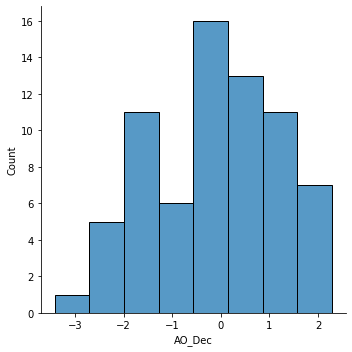

In [71]:
sns.displot(df_Cluj_Napoca['AO_Dec'])

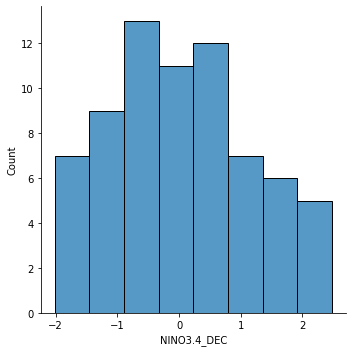

In [72]:
sns.displot(df_Cluj_Napoca['NINO3.4_DEC'])

As we can see, the data for the feature 'NINO3.4_DEC' is normally distributed and the data for the feature 'Ao_Dec' is not. As a result a want to transform the data for both features using Standard Scaler.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler_Cluj_Napoca=StandardScaler()

In [74]:
df_Cluj_Napoca[['AO_Dec', 'NINO3.4_DEC']] = scaler_Cluj_Napoca.fit_transform(df_Cluj_Napoca[['AO_Dec', 'NINO3.4_DEC']])

In [75]:
df_Cluj_Napoca.head()

,DATE,CLUJ NAPOCA,AO_Dec,NINO3.4_DEC
0,1950.0,0.0,-1.373127,-0.566942
1,1951.0,0.0,1.600656,0.569748
2,1952.0,0.0,-1.296409,-0.006090
3,1953.0,1.0,0.528119,0.750198
4,1954.0,1.0,0.511408,-0.575679


I also want to check the correlation between my independent features 'AO_Dec' and 'NINO3.4_DEC' by using a correlation matrix.

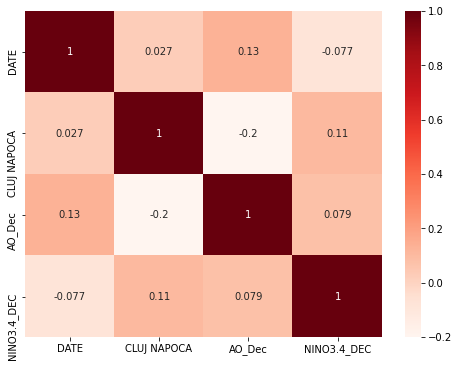

In [76]:
plt.figure(figsize=(8,6))
cor = df_Cluj_Napoca.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that the there is no correlation between the independent features.

Next, I want to test the performance of different models on the data set regarding the weather information on Cluj Napoca, such as Logistic Regression, Support Vector Classifier, Random Forest Classifier, and XGBoost Classifier, with the help of StratifiedKFold cross validator, and after that, to choose the best performing model to try to predict the estimated probability regarding the binary outcome: if in 2020 Cluj Napoca will have a White Christmas (1) or not (0).

In [77]:
X_CJ = df_Cluj_Napoca[["AO_Dec", "NINO3.4_DEC"]]
y_CJ = df_Cluj_Napoca["CLUJ NAPOCA"]

In [78]:
from sklearn.svm import SVC
svc_CJ = SVC(probability=True)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc_CJ = RandomForestClassifier()

In [80]:
from sklearn.linear_model import LogisticRegression
lr_CJ=LogisticRegression()

In [81]:
from xgboost import XGBClassifier
xgbc_CJ=XGBClassifier(use_label_encoder=False, eval_metric = 'error')

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


scores_model = {}
models = [svc_CJ, rfc_CJ, lr_CJ, xgbc_CJ]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X_CJ, y_CJ)

for model in models:
    accuracy = []
    for train_index, test_index in skf.split(X_CJ, y_CJ):
        X1_train, X1_test = X_CJ.iloc[train_index], X_CJ.iloc[test_index]
        y1_train, y1_test = y_CJ.iloc[train_index], y_CJ.iloc[test_index]

        model.fit(X1_train, y1_train)
        prediction = model.predict(X1_test)
        score = accuracy_score(prediction, y1_test)
        accuracy.append(score)
    scores_model[model] = np.array(accuracy).mean()
print(scores_model)
print(max(scores_model.items(), key = lambda k : k[1]))

{SVC(probability=True): 0.6714285714285715, RandomForestClassifier(): 0.6571428571428571, LogisticRegression(): 0.5857142857142856, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None): 0.5999999999999999}
(SVC(probability=True), 0.6714285714285715)


In [83]:
svc_CJ.predict_proba([[0, -1.5]])

array([[0.7736747, 0.2263253]])

In [84]:
svc_CJ.predict([[0, -1.5]])

array([0.])

The best score obtained by a model was the Support Vector Classifier one, with a score of 0.67 which is a good one and when I aplied it to deterime the probability of there being registered a White Christmas in 2020 in Cluj Napoca,  the outcome was that there is a 77% probability of a White Christmas not being registered in 2020 in Cluj Napoca and a 23% probability of there being one registered.

## Sibiu

In [85]:
df_Sibiu.head()

,DATE,SIBIU,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.668,-0.230481
1,1962.0,1.0,-0.711,-0.587935
2,1963.0,1.0,-1.178,1.389670
3,1964.0,1.0,-0.246,-0.702970
4,1965.0,1.0,0.163,1.905510


In [86]:
df_Sibiu.shape

(59, 4)

I want to check out how balanced are the values from my dependent variable 'SIBIU' which contains the answer if the city had a White Christmas or not in every year of my data set.

In [87]:
df_Sibiu["SIBIU"].value_counts()

0.0    36
1.0    23
Name: SIBIU, dtype: int64

As we can see above, the values from my dependent variable are very balanced with a ratio of 60:40. The only thing that could generate problems is the fact that the data set has a small number of items because my data set focuses only on one day of the year, the 25th of December, from 1950 to 2019.

Next, I want to check the distribution of the data for the independent features.

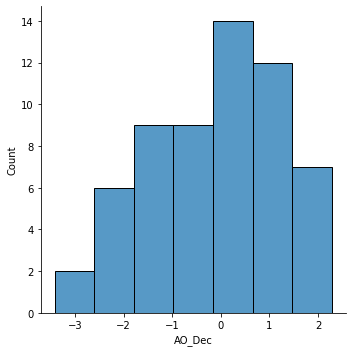

In [88]:
sns.displot(df_Sibiu['AO_Dec'])

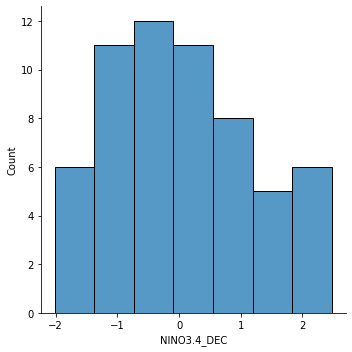

In [89]:
sns.displot(df_Sibiu['NINO3.4_DEC'])

As we can see, the data for the feature 'NINO3.4_DEC' is relatively normally distributed and the data for the feature 'Ao_Dec' is not. As a result a want to transform the data for both features using Standard Scaler.

In [90]:
scaler_Sibiu=StandardScaler()

In [91]:
df_Sibiu[['AO_Dec', 'NINO3.4_DEC']] = scaler_Sibiu.fit_transform(df_Sibiu[['AO_Dec', 'NINO3.4_DEC']])

In [92]:
df_Sibiu.head()

,DATE,SIBIU,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.166190,-0.229255
1,1962.0,1.0,-0.452947,-0.530605
2,1963.0,1.0,-0.800998,1.136607
3,1964.0,1.0,-0.106387,-0.627585
4,1965.0,1.0,0.198437,1.571484


I also want to check the correlation between my independent features 'AO_Dec' and 'NINO3.4_DEC' by using a correlation matrix.

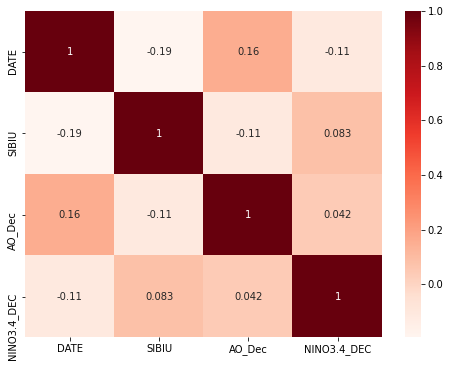

In [93]:
plt.figure(figsize=(8,6))
cor = df_Sibiu.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that the there is no correlation between the independent features.

Next, I want to test the performance of different models on the data set regarding the weather information on Sibiu, such as Logistic Regression, Support Vector Classifier, Random Forest Classifier, and XGBoost Classifier, with the help of StratifiedKFold cross validator, and after that, to choose the best performing model to try to predict the estimated probability regarding the binary outcome: if in 2020 Sibiu will have a White Christmas (1) or not (0).

In [94]:
X_SB = df_Sibiu[["AO_Dec", "NINO3.4_DEC"]]
y_SB = df_Sibiu["SIBIU"]

In [95]:
svc_Sibiu = SVC(probability=True)

In [96]:
rfc_Sibiu = RandomForestClassifier()

In [97]:
lr_Sibiu=LogisticRegression()

In [98]:
xgbc_Sibiu=XGBClassifier(use_label_encoder=False, eval_metric = 'error')

In [99]:
scores_model = {}
models = [svc_Sibiu, rfc_Sibiu, lr_Sibiu, xgbc_Sibiu]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X_SB, y_SB)

for model in models:
    accuracy = []
    for train_index, test_index in skf.split(X_SB, y_SB):
        X2_train, X2_test = X_SB.iloc[train_index], X_SB.iloc[test_index]
        y2_train, y2_test = y_SB.iloc[train_index], y_SB.iloc[test_index]

        model.fit(X2_train, y2_train)
        prediction = model.predict(X2_test)
        score = accuracy_score(prediction, y2_test)
        accuracy.append(score)
    scores_model[model] = np.array(accuracy).mean()
print(scores_model)
print(max(scores_model.items(), key = lambda k : k[1]))

{SVC(probability=True): 0.61, RandomForestClassifier(): 0.58, LogisticRegression(): 0.5933333333333333, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None): 0.6133333333333333}
(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_cons

In [100]:
xgbc_Sibiu.predict(X1_test)

array([0, 0, 1, 1, 0, 1, 0])

In [101]:
p = [[0, -1.5]]

In [102]:
p = np.array(p).reshape((1,-1))

In [103]:
xgbc_Sibiu.predict_proba(p)

array([[0.96936125, 0.03063873]], dtype=float32)

The best score obtained by a model was the XGBoost Classifier one, with a score of 0.61 which is a good one and when I aplied it to deterime the probability of there being registered a White Christmas in 2020 in Sibiu, the outcome was that there is a 97% probability of a White Christmas not being registered in 2020 in Sibiu and a 3% probability of there being one registered.

## Deva

In [104]:
df_Deva.head()

,DATE,DEVA,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.668,-0.230481
1,1962.0,1.0,-0.711,-0.587935
2,1963.0,1.0,-1.178,1.389670
3,1964.0,0.0,-0.246,-0.702970
4,1965.0,1.0,0.163,1.905510


In [105]:
df_Deva.shape

(59, 4)

I want to check out how balanced are the values from my dependent variable 'DEVA' which contains the answer if the city had a White Christmas or not in every year of my data set.

In [106]:
df_Deva["DEVA"].value_counts()

0.0    38
1.0    21
Name: DEVA, dtype: int64

As we can see above, the values from my dependent variable are very balanced with a ratio of almost 60:40. The only thing that could generate problems is the fact that the data set has a small number of items because my data set focuses only on one day of the year, the 25th of December, from 1950 to 2019.

Next, I want to check the distribution of the data for the independent features.

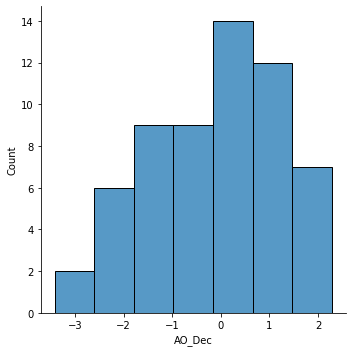

In [107]:
sns.displot(df_Deva['AO_Dec'])

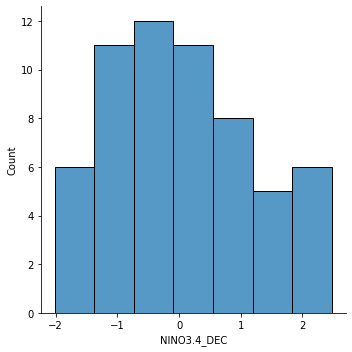

In [108]:
sns.displot(df_Deva['NINO3.4_DEC'])

As we can see, the data for the feature 'NINO3.4_DEC' is relatively normally distributed and the data for the feature 'Ao_Dec' is not. As a result a want to transform the data for both features using Standard Scaler.

In [109]:
scaler_Deva=StandardScaler()

In [110]:
df_Deva[['AO_Dec', 'NINO3.4_DEC']] = scaler_Deva.fit_transform(df_Deva[['AO_Dec', 'NINO3.4_DEC']])

In [111]:
df_Deva.head()

,DATE,DEVA,AO_Dec,NINO3.4_DEC
0,1961.0,1.0,-1.166190,-0.229255
1,1962.0,1.0,-0.452947,-0.530605
2,1963.0,1.0,-0.800998,1.136607
3,1964.0,0.0,-0.106387,-0.627585
4,1965.0,1.0,0.198437,1.571484


I also want to check the correlation between my independent features 'AO_Dec' and 'NINO3.4_DEC' by using a correlation matrix.

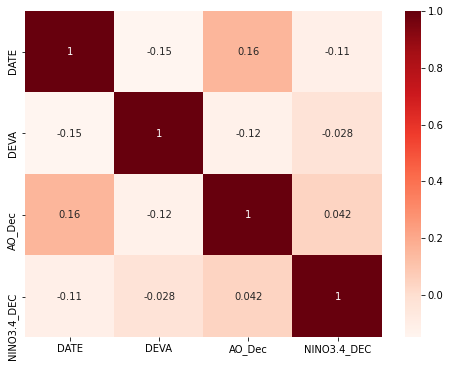

In [112]:
plt.figure(figsize=(8,6))
cor = df_Deva.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that the there is no correlation between the independent features.

Next, I want to test the performance of different models on the data set regarding the weather information on Deva, such as Logistic Regression, Support Vector Classifier, Random Forest Classifier, and XGBoost Classifier, with the help of StratifiedKFold cross validator, and after that, to choose the best performing model to try to predict the estimated probability regarding the binary outcome: if in 2020 Deva will have a White Christmas (1) or not (0).

In [113]:
X_DV = df_Deva[["AO_Dec", "NINO3.4_DEC"]]
y_DV = df_Deva["DEVA"]

In [114]:
svc_Deva = SVC(probability=True)

In [115]:
rfc_Deva = RandomForestClassifier()

In [116]:
lr_Deva=LogisticRegression()

In [117]:
xgbc_Deva=XGBClassifier(use_label_encoder=False,  eval_metric = 'error')

In [118]:
scores_model = {}
models = [svc_Deva, rfc_Deva, lr_Deva, xgbc_Deva]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(X_DV, y_DV)

for model in models:
    accuracy = []
    for train_index, test_index in skf.split(X_DV, y_DV):
        X3_train, X3_test = X_DV.iloc[train_index], X_DV.iloc[test_index]
        y3_train, y3_test = y_DV.iloc[train_index], y_DV.iloc[test_index]

        model.fit(X3_train, y3_train)
        prediction = model.predict(X3_test)
        score = accuracy_score(prediction, y3_test)
        accuracy.append(score)
    scores_model[model] = np.array(accuracy).mean()
print(scores_model)
print(max(scores_model.items(), key = lambda k : k[1]))

{SVC(probability=True): 0.6266666666666667, RandomForestClassifier(): 0.6266666666666666, LogisticRegression(): 0.6266666666666667, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None): 0.5966666666666666}
(SVC(probability=True), 0.6266666666666667)


In [119]:
svc_Deva.predict(X1_test)

array([0., 0., 0., 0., 0., 0., 0.])

In [120]:
svc_Deva.predict_proba([[0, -1.5]])

array([[0.69576902, 0.30423098]])

In [121]:
svc_Deva.predict([[0, -1.5]])

array([0.])

The best score obtained by a model was the Support Vector Classifier one, with a score of 0.63 which is a good one and when I aplied it to deterime the probability of there being registered a White Christmas in 2020 in Deva, the outcome was that there is a 70% probability of a White Christmas not being registered in 2020 in Deva and a 30% probability of there being one registered.

As we can see, for calculating these scores of the models, the data sets used their test data which had a small number of values. As a result, probably if I could have a larger number of values, the scores would be better. We also have to take into account the fact that, overall, the time span for which the weather data was registered, is small. For temperatures and precipitation in some weather stations like the ones from Great Britain we can find the data beginning with the 18th century and for the indexes like in our case, AO and NINO3.4, I could only find data from 1950 until the present day and if you are interested in only one day of the year, automatically the range of the data will be smaller.

Overall, based on our findings, we can conclude that this year there will not be a White Christmas in Transylvania.